In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [46]:
data=pd.read_excel(r"C:\Users\LENOVO\Downloads\48495653_1694749068744.xls")
data.head()

,Principal Amount,Interest Amount,Statement Date
0,4096.79,3340.00,13 Nov 2020
1,4165.21,3271.58,13 Dec 2020
2,4234.77,3202.02,13 Jan 2021
3,4305.49,3131.30,13 Feb 2021
4,4377.39,3059.40,13 Mar 2021


In [32]:
data.columns

Index(['Principal Amount', 'Interest Amount', 'Statement Date'], dtype='object')

In [47]:
data["Total"]=data['Principal Amount']+data['Interest Amount']

In [48]:
df=pd.DataFrame(data, columns=data.columns)

In [49]:
df.head()

,Principal Amount,Interest Amount,Statement Date,Total
0,4096.79,3340.00,13 Nov 2020,7436.79
1,4165.21,3271.58,13 Dec 2020,7436.79
2,4234.77,3202.02,13 Jan 2021,7436.79
3,4305.49,3131.30,13 Feb 2021,7436.79
4,4377.39,3059.40,13 Mar 2021,7436.79


In [50]:
df=df.iloc[:,[0,1,3,2]]

In [51]:
df

,Principal Amount,Interest Amount,Total,Statement Date
0,4096.79,3340.00,7436.79,13 Nov 2020
1,4165.21,3271.58,7436.79,13 Dec 2020
2,4234.77,3202.02,7436.79,13 Jan 2021
3,4305.49,3131.30,7436.79,13 Feb 2021
4,4377.39,3059.40,7436.79,13 Mar 2021
5,4450.49,2986.30,7436.79,13 Apr 2021
6,4524.81,2911.98,7436.79,13 May 2021
7,4600.38,2836.41,7436.79,13 Jun 2021
8,4677.20,2759.59,7436.79,13 Jul 2021
9,4755.31,2681.48,7436.79,13 Aug 2021


In [65]:
df['Date'] = pd.to_datetime(df['Statement Date'])

In [72]:
df.set_index('Date', inplace=True)

In [68]:
df.drop("Statement Date", axis=1, inplace=True)

In [69]:
df.head()

,Principal Amount,Interest Amount,Total,Date
0,4096.79,3340.00,7436.79,2020-11-13
1,4165.21,3271.58,7436.79,2020-12-13
2,4234.77,3202.02,7436.79,2021-01-13
3,4305.49,3131.30,7436.79,2021-02-13
4,4377.39,3059.40,7436.79,2021-03-13


In [73]:
max_interest_month = df['Interest Amount'].idxmax().strftime('%B')

In [82]:
max_interest_row = df[df['Interest Amount'] == df['Interest Amount'].max()]
max_interest_row

,Principal Amount,Interest Amount,Total
Date,,,
2020-11-13,4096.79,3340.0,7436.79


In [ ]:
max_interest_row

In [83]:
df.head()

,Principal Amount,Interest Amount,Total
Date,,,
2020-11-13,4096.79,3340.00,7436.79
2020-12-13,4165.21,3271.58,7436.79
2021-01-13,4234.77,3202.02,7436.79
2021-02-13,4305.49,3131.30,7436.79
2021-03-13,4377.39,3059.40,7436.79


In [74]:
max_interest_month

'November'

In [77]:
min_interest_month = df['Interest Amount'].idxmin().strftime('%B')
min_interest_month

'October'

In [59]:
df["Principal Amount"].sum()

200000.0

In [60]:
df.columns

Index(['Principal Amount', 'Interest Amount', 'Total', 'Statement Date'], dtype='object')

In [61]:
df['Interest Amount'].sum()

67724.57

In [62]:
df['Interest Amount'].min()

122.16

In [63]:
df['Interest Amount'].max()

3340.0

In [52]:
df.corr()

,Principal Amount,Interest Amount,Total
Principal Amount,1.000000,-1.000000,0.312017
Interest Amount,-1.000000,1.000000,-0.311997
Total,0.312017,-0.311997,1.000000


In [53]:
df.corr().tail(1)

,Principal Amount,Interest Amount,Total
Total,0.312017,-0.311997,1.0


In [54]:
df.describe()

,Principal Amount,Interest Amount,Total
count,36.000000,36.000000,36.000000
mean,5555.555556,1881.238056,7436.793611
std,966.542943,966.536183,0.021667
min,4096.790000,122.160000,7436.790000
25%,4735.782500,1108.790000,7436.790000
50%,5474.355000,1962.435000,7436.790000
75%,6328.000000,2701.007500,7436.790000
max,7314.760000,3340.000000,7436.920000


<Axes: xlabel='Principal Amount', ylabel='Density'>

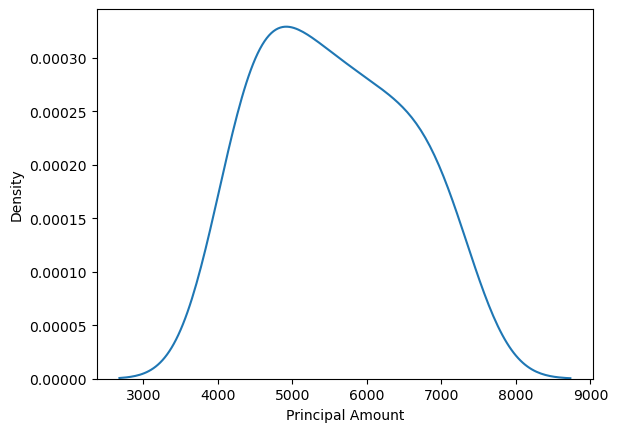

In [56]:
 sns.kdeplot(df["Principal Amount"])

<Axes: xlabel='Interest Amount', ylabel='Density'>

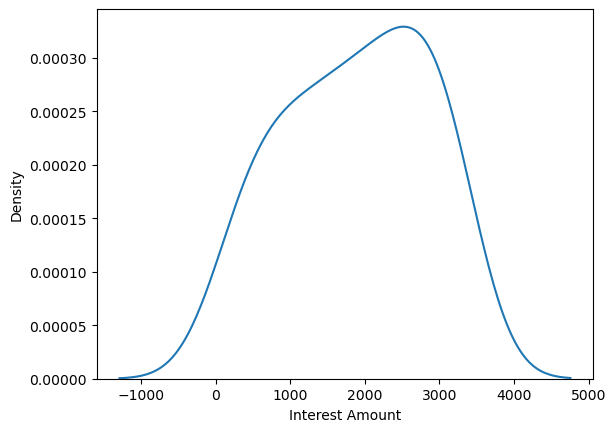

In [57]:
 sns.kdeplot(df["Interest Amount"])